In [1]:
import sys
sys.path.append("..")
from damage_indicator_module import*

set_plot_formatting()

#### Figure 1B: FEMA P695 Ground motion spectra

In [2]:
# INPUT DATA OF GROUND MOTIONS
building_id = 'ID1012'
results_filename = '../0_Back_to_back_IDA_data/all_results_' + building_id + '.h5'

Ts = np.linspace(0,15,int(15/0.05+1)) # Structural period list

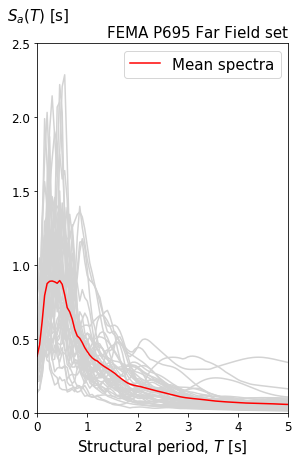

In [3]:
plot_scale = 10

# Retrieve spectra
with h5py.File(results_filename, 'r') as hf:
    # Get hinge capacity    
    key = '/ground_motion_records/gm_response_spectra'
    gm_spectra = pd.read_hdf(results_filename, key)

im_list = gm_spectra.keys()

# Plot
fig = plt.figure(figsize=(4.5, 6.8))

# Each ground motion
for gm_i in range(len(gm_spectra)):
    gm_id = 'GM' + str(gm_i+1)
    _ = plt.plot(Ts, gm_spectra[:].loc[gm_id].values, c='lightgray')

# Median and mean
spectra_mean = np.zeros(len(Ts))
for t_i in range(len(Ts)):
    spectra_mean[t_i] = np.mean(gm_spectra[im_list[t_i]].values)
_ = plt.plot(Ts, spectra_mean, c='r', label='Mean spectra')

# Format
_ = plt.xlim([0, 5])
_ = plt.ylim([0, 2.5])
_ = plt.xlabel('Structural period, $T$ [s]')
_ = plt.ylabel('$S_a(T)$ [s]', y=1.05, rotation='horizontal',ha="left")
_ = plt.title('FEMA P695 Far Field set', loc='right')
_ = plt.legend()

plt.savefig('GM_spectra.pdf')